# NTU Data Visualization Workshop Workbook (Student Version)
Welcome to the NTU Data Visualization Workshop.  This notebook contains examples of several commonly used plots.  The order of the notebook follows the order of the accompanying presentation.  Each section ends with an exercise that you will need to complete.  Example solutions will be uploaded to Github after the session, but remember: data visualization is also an art, and the solutions you come up with in class may be better.

## Getting Started
This notebook focuses on data visualization in Python.  We will be using the following libraries:
- **Seaborn** - A library which provides many plot types and lots of options for customization.
- **Matplotlib** - Provides much of the same plotting functionality as Matlab.
- **Numpy** - Provides array and matrix datatypes for Python.
- **Pandas** - Allows easy loading of datasets in CSV, or Excel data formats.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import seaborn.objects as so


## Visualizing Relationships


### Scatter Plots
One of the easiest ways to visualize the relationship between two variables is a scatterplot.  Although you cannot make any statistical arguments by looking at a scatter plot, it serves as a useful tool to demonstrate relationships and during the data exploration phase.

Suppose we believe there is a relationship between vehicle age and mpg (miles-per-gallon: a measure of fuel efficiency in the US).  First, we nee a dataset with a list of vehicles, the year they were built, and their respective mpg.

In [2]:
mpg_dataset = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/mpg.csv")
mpg_dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


This dataset is a list of vehicles and their respective stats.  With Seaborn, we can use the objects API to easily plot model year (year of manufacture) versus mpg.

1. Start by instatiating a Plot object and specifying the ```data```
to plot along with the features represented by the ```x``` and ```y``` axes.  If we want to further segragate data, we can specify another feature with the ```color``` argument.
2. Add a ```Dots()``` plot.
3. Overwrite labels with ```.loabel()``` to make them look more professional.
4. Use the ```show()``` method to display the plot. (This is not required in Google Colab, but will be necessary if you run this script independently with Python.

**Reflection:** *Can you see any interesting trends in the plotted data?*




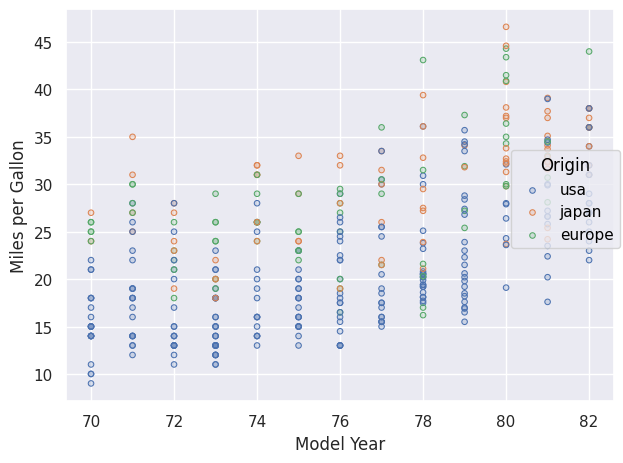

In [3]:
(
  so.Plot(data=mpg_dataset, x="model_year", y="mpg", color="origin")
    .add(so.Dots())
    .label(x="Model Year", y="Miles per Gallon", color=str.capitalize)
    .show()
)

### Aggregating Data
Interesting, by looking at the colors, it appears that while fuel efficiency has increased over the year, cars made in Europe or Japan are generally more efficient than those made in the US.  However, the data is very noisy.  Seaborn gives us the ```Agg()``` object to allow use to aggregate data along the dimensions we wish to plot.  This means taking all the data points and simply returning their average.

**Reflection:** *What is the difference between aggregating by ```mean``` and ```median```?*

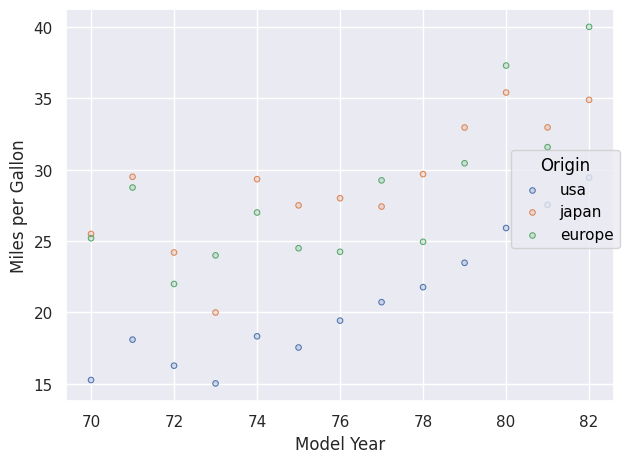

In [4]:
(
  so.Plot(data=mpg_dataset, x="model_year", y="mpg", color="origin")
    .add(so.Dots(), so.Agg("mean"))
    .label(x="Model Year", y="Miles per Gallon", color=str.capitalize)
    .show()
)

### Line Charts
Above, we see the average fuel efficiency for all cars from a specific region for each year, however, it is difficult to visualize the trend over time.  For this we will turn to a line chart.  With Seaborn objects, this is easy to accomplish with the ```Line()``` object.

**Reflection:** *Is it better to use linear interpolation to generate the lines between data points or use smooth curves like a spline?*

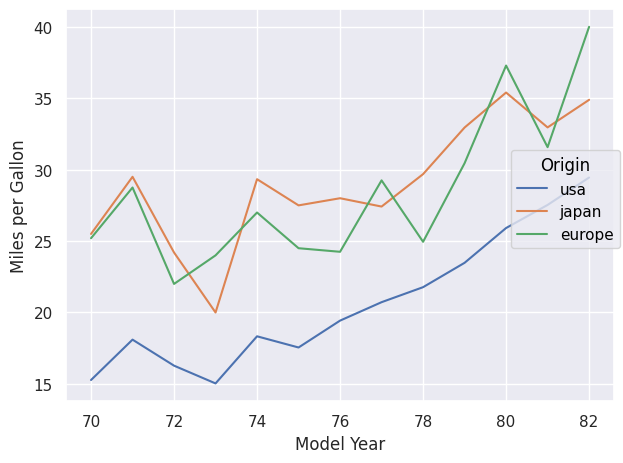

In [5]:
(
  so.Plot(data=mpg_dataset, x="model_year", y="mpg", color="origin")
    .add(so.Line(), so.Agg("mean"))
    .label(x="Model Year", y="Miles per Gallon", color=str.capitalize)
    .show()
)

### Confidence Intervals
The chart above may be misleading.  For instance, not every car manufactured in Europe was more efficent than every car manufactured in the United States in 1978.  We can use confidence intervals to show how tight the distribution of fuel efficiency is for each country for each year.

We use the ```Band()``` object to add a shaded region around each line.  The ```Est()``` object functions similar to the ```Agg()``` object we used earlier, except instead of returning a single number, it returns and upper and lower bound on the confidence interval (in this case 95%).

**Reflection:** *What does the shaded region (95% confidence interval) represent?*

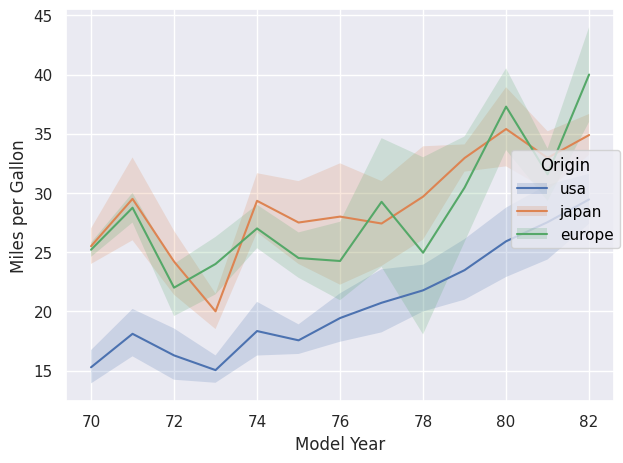

In [6]:
(
  so.Plot(data=mpg_dataset, x="model_year", y="mpg", color="origin")
    .add(so.Line(), so.Agg("mean"))
    .add(so.Band(), so.Est(errorbar=("ci", 95)))
    .label(x="Model Year", y="Miles per Gallon", color=str.capitalize)
    .show()
)

### Exercise 1: Visualizing the Stock Market
The code below loads a dataset of the Dow Jones Industrial Average (a stock market index) between 1914 and 1968.  Can you plot the index price over time?

In [7]:
dowjones = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/dowjones.csv", parse_dates=["Date"])
dowjones

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45
...,...,...
644,1968-08-01,883.72
645,1968-09-01,922.80
646,1968-10-01,955.47
647,1968-11-01,964.12


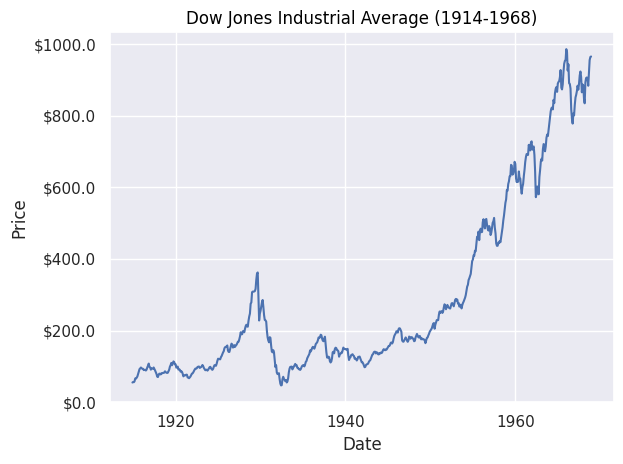

In [8]:
# Your code here
# HINT: this data is already a time series, so you don't need to use an agregator.
(
  so.Plot(data=dowjones, x="Date", y="Price")
    .add(so.Line())
    .scale(x=so.Temporal().tick(upto=5), y=so.Continuous().label(like="${x}"))
    .label(title="Dow Jones Industrial Average (1914-1968)")
    .show()
)

## Visualizing Amounts and Proportions

For this series of exercises we will use the Titanic dataset.  The dataset is available in CSV form and contains information about all the passengers on the infamous steam ship, Titanic. Run the code below to load the dataset and see what features (columns) are available.

In [9]:
titanic = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/titanic.csv")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Bar Charts
One of the simplest ways to visualize amounts is to use a bar chart.  Bar charts are great at comparing raw values from different categories and give a better feeling about the difference between amounts than tabular data.  In Seaborn, we can use the ```Count()``` object to get a count of all data with a particular feature, in this case passenger class, which we will plot along the ```y``` axis.  The bar chart itself can be drawn using the ```Bar()``` object.

**Reflection:** *Which is better, horizontal or vertical bars?*

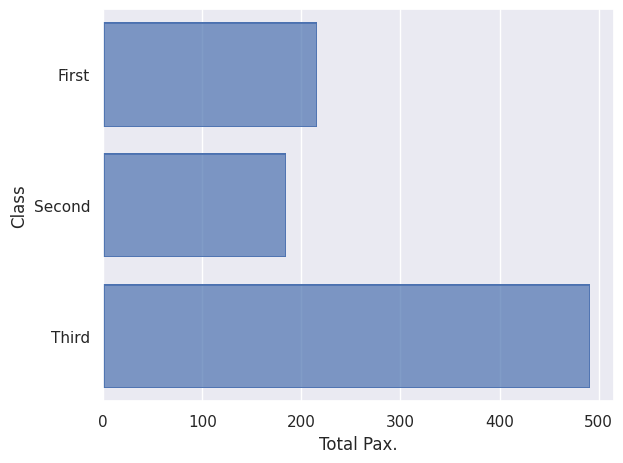

In [10]:
(
  so.Plot(titanic, y="class")
    .add(so.Bar(), so.Count())
    .scale(y=so.Nominal(order=["First", "Second", "Third"]))
    .label(y="Class", x="Total Pax.")
    .show()
)

### Bar Charts Divided by Category
We can use the ```color``` argument in ```Plot()``` to segregate our data by another feature, for example, sex.  Note that in Seaborn, the bars will be drawn on top of each other unless we use ```Dodge()``` to make them appear side by side.

**Reflection:** *Is it ever possible for bars to extend in the negative direction?*

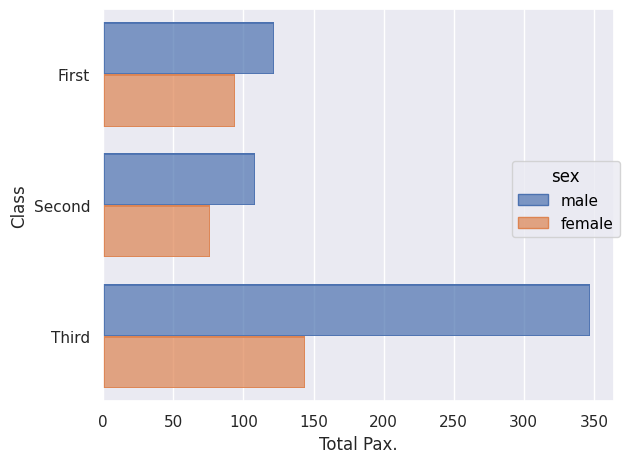

In [11]:
(
  so.Plot(titanic, y="class", color="sex")
    .add(so.Bar(), so.Count(), so.Dodge())
    .scale(y=so.Nominal(order=["First", "Second", "Third"]))
    .label(y="Class", x="Total Pax.")
    .show()
)

### Stacked Bars
Placing the bars side by side gives us a good fealing of the proportion of males to females in each class, but it makes it difficult to visualize the total class-to-class difference among all genders.  We have the option of stacking bars with the ```Stack()``` object to emphasize this.

**Reflection:** *How can you better illustrate that a ratio between two classes in changing, not just the total amount?*

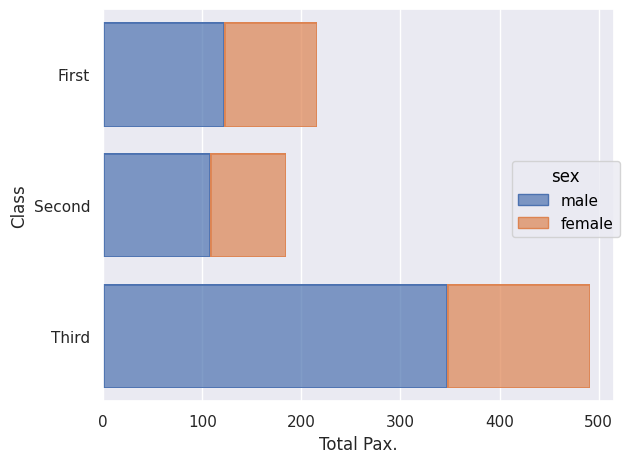

In [12]:
(
  so.Plot(titanic, y="class", color="sex")
    .add(so.Bar(), so.Count(), so.Stack())
    .scale(y=so.Nominal(order=["First", "Second", "Third"]))
    .label(y="Class", x="Total Pax.")
    .show()
)

### Histograms
In the example above there are three distinct classes: First, Second, and Third.  However, for some features like ```age``` there are an infinite number of possible values.  We can still get an idea of the number of people in each agerange by creating artificial *bins*, which represent an age range and allocating each sample one of these bins.  Luckily, we can do this automatically with the seaborn ```Hist()``` object.

**Reflection:** *What is the best number of bins to use in a histogram?*

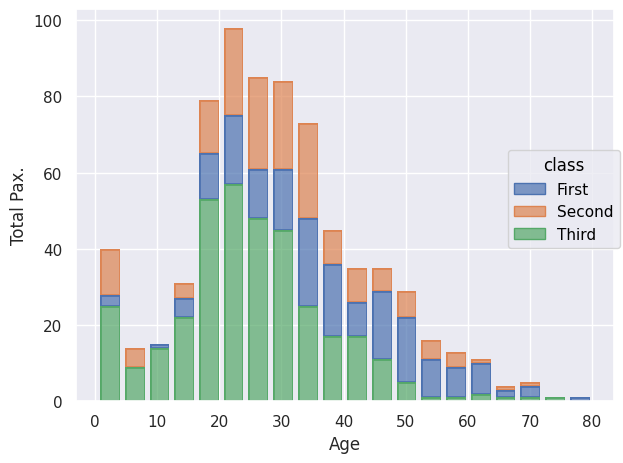

In [13]:
(
  so.Plot(titanic, x="age", color="class")
    .add(so.Bar(), so.Hist(), so.Stack())
    .scale(color=so.Nominal(order=["First", "Second", "Third"]))
    .label(x="Age", y="Total Pax.")
    .show()
)

### Exercise 2: Do People Tip More on the Weekend?
The code below loads a dataset of tip amounts with several features.  Can you plot a histogram of tip amount over the days of the week?

In [14]:
tips = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/tips.csv")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


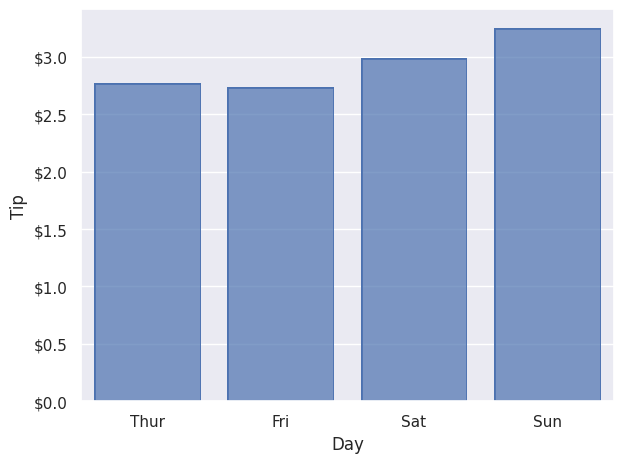

In [15]:
# Your code here
# HINT: You will need to use a histogram or an aggregator depending on how you interpret "tip amount."
(
  so.Plot(tips, x="day", y="tip")
    .add(so.Bar(), so.Agg("mean"))
    .scale(x=so.Nominal(order=["Thur", "Fri", "Sat", "Sun"]), y=so.Continuous().label(like="${x}"))
    .label(x="Day", y="Tip")
    .show()
)

## Visualizing Distributions

### Box Plots
One of the easiest ways to visualize a distribution of data is with a box plot.  The box plot is a graphical representation of the five-number summary: minimum, first quartile, median, third quartile, and maximum.  This allows us to see the skewness and variance of a distribution in addition to its median value.

For this exercise, we will use the iris dataset, which contains measurements from various species of irises.

In [16]:
iris = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/iris.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


For distribution plots we can no longer use Seaborn's objects API.  Instead we will use seaborn to directly draw on a set of Matplotlib axes.  The ```catplot``` function allows us to plot distibutions of a feature, ```x``` for each category in ```y```.  The function returns a handle to a set of axes that we can use to set axes labels.

If you run this script outside of Google Colab, you will need to used the ```plt.show()``` command to display the figure.

**Reflection:** *What do the whiskers on the box plot represent?  What about the edges of the boxes?*

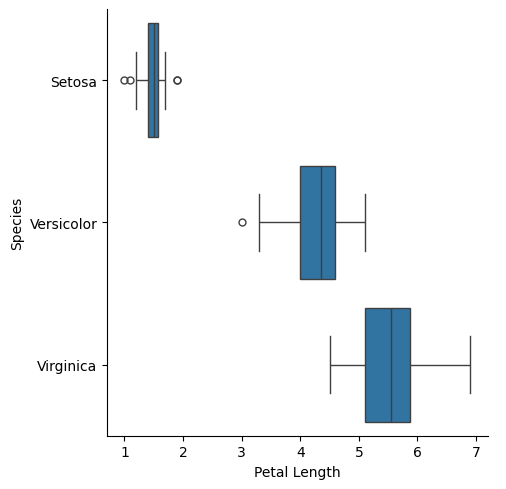

In [17]:
ax = sns.catplot(data=iris, x="petal_length", y="species", kind="box")
ax.set(xlabel="Petal Length", ylabel="Species")
ax.set_yticklabels(["Setosa", "Versicolor", "Virginica"])
plt.show()

### Violin Plots

Boxplots can help us visualize the skewness of a distribution, however, not all distributions are unimodal, i.e., the probability distribution function (PDF) has more than one peak.  To visualize this, we can use a violin plot, which shows the PDF of each plotted distribution.  To create a violin plot with Seaborn, use the ```catplot``` function with parameter ```kind="violin"```.

**Reflection:** *How are discrete data points transformed into a continuous distribution?  Is this always accurate?*

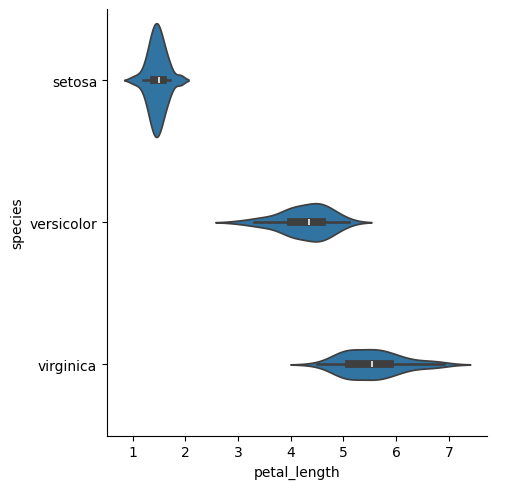

In [18]:
sns.catplot(
    data=iris, x="petal_length", y="species",
    kind="violin"
)
ax.set(xlabel="Petal Length", ylabel="Species")
ax.set_yticklabels(["Setosa", "Versicolor", "Virginica"])
plt.show()

### Bivariate Plots
Sometimes we want to visualize a distribition over two numerical features.  An easy way to do this is with a bivariate plot.  We will use Seaborn's ```displot``` function to accomplish this.

**Reflection:** *How could we visualize distributions across more than three features?*

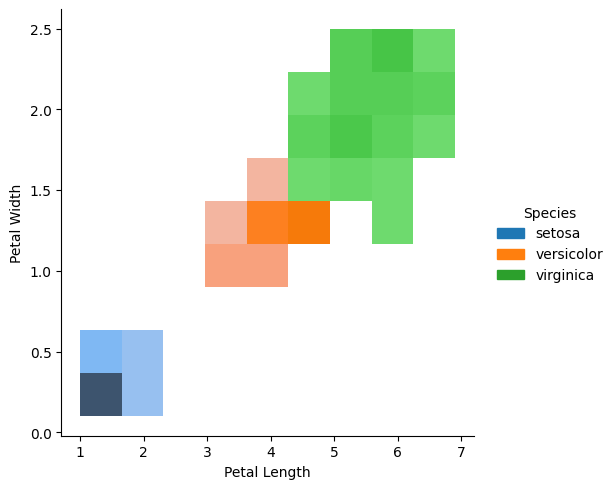

In [19]:
ax = sns.displot(data=iris, x="petal_length", y="petal_width", hue="species")
ax.set(xlabel="Petal Length", ylabel="Petal Width")
ax.legend.set_title("Species")
plt.show()

### Bivariate Contour Plots
Sometimes we want a smoother representation of the data.  A type of model called a kernel density estimate (KDE) models a discrete distribution as a continuous one by summing multiple normal distributions, each with a mean located at one of the data points.  In Seaborn we can use the ```kind="kde"``` argument to the ```displot``` function to create a contour plot based on such a KDE.

**Reflection:** *Does changing the kernel bandwidth impact how the data is presented?*

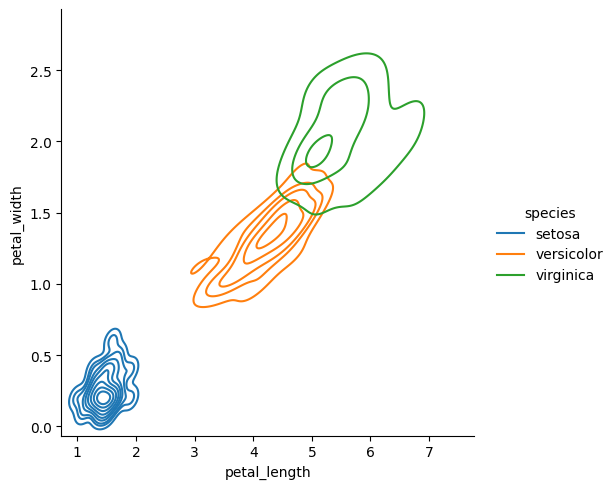

In [20]:
sns.displot(data=iris, x="petal_length", y="petal_width", hue="species", kind="kde")
ax.set(xlabel="Petal Length", ylabel="Petal Width")
ax.legend.set_title("Species")
plt.show()

### Exercise 3: Classifying Penguins
The code below loads a dataset of the bill and flipper length of several species of penguins.  Can you plot a kernel density estimate (KDE) of the distribution of flipper length ond bill length for each species?

In [21]:
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/penguins.csv")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


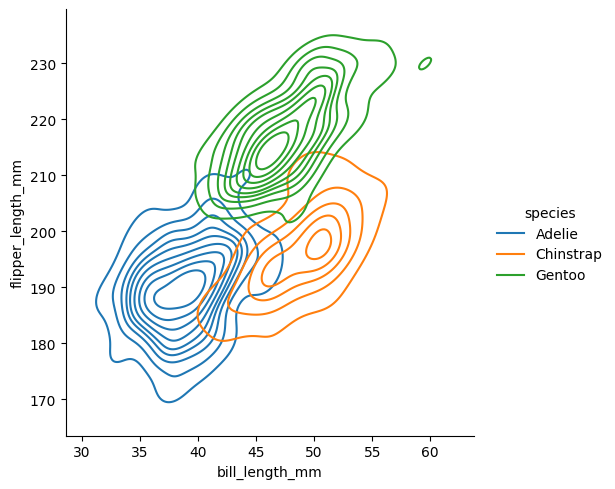

In [22]:
# Your code here
# HINT: You will need to use a histogram or an aggregator depending on how you interpret "tip amount."
sns.displot(data=penguins, x="bill_length_mm", y="flipper_length_mm", hue="species", kind="kde")
ax.set(xlabel="Bill Length", ylabel="Flipper Length")
ax.legend.set_title("Species")
plt.show()

## Visualizing More Than Two Dimensions


### Pivot Tables
Sometimes data in its raw tabular form does not lend itself well to visualization.  Consider the dataset of number of passengers per month per year below.  While we could easily plot this as a line graph, we may want to see if certain months are more popular for travel every year and if there are any year-to-year trends for the same month.

In [26]:
flights = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/flights.csv")
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


We can use a pivot table to transform the data so that years are rows and months are columns.  To do this we will use Pandas built-in ```pivot()``` method with ```index``` as year and ```columns``` as month.  The ```values``` is the number used to fill each cell of the new table.

In [27]:
flights = flights.pivot(index="year", columns="month", values="passengers")
flights

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
1949,129,148,118,118,112,148,135,132,121,104,119,136
1950,135,170,140,126,115,170,149,141,125,114,133,158
1951,163,199,166,150,145,199,178,178,172,146,162,184
1952,181,242,194,180,171,230,218,193,183,172,191,209
1953,235,272,201,196,196,264,243,236,229,180,211,237
1954,227,293,229,188,204,302,264,235,234,203,229,259
1955,269,347,278,233,242,364,315,267,270,237,274,312
1956,313,405,306,277,284,413,374,317,318,271,306,355
1957,348,467,336,301,315,465,422,356,355,305,347,404


### Heatmaps
While this table makes it easier to identify year-on-year trends for each month, it's still difficult to parse.  We can use a heatmap, which assigns brighter colors to higher values, just like brighter/darker areas of a flame. We use Seaborn's ```heatmap``` function below.

**Reflection:** *Which is better, lighter or darker colors representing higher values?*

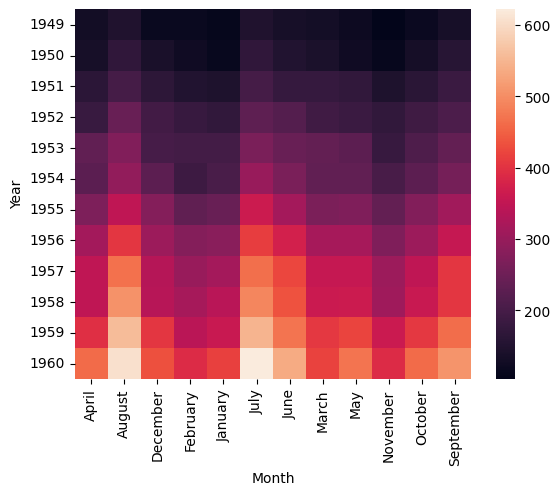

In [24]:
ax = sns.heatmap(flights)
ax.set(xlabel="Month", ylabel="Year")
plt.show()

### Annotated Heatmap
While the visualization above gives us a good intuitive feel, sometimes we still want to visualize the actual numbers.  
1. We use ```annot=True``` to accomplish this.  The ```fmt=".0f"``` tells seaborn not to display any decimal point.  This can be used for rounding decimal numbers.
2. We can also remove the colorbar with ```cbar=False```.
3. You can change the color palette with the ```cmap``` argument.  Additional color palettes are available in the [Seaborn documentation](https://seaborn.pydata.org/tutorial/color_palettes.html)

**Reflection:** *How would you round the annotation data to the nearest tenth (e.g. 0.3333 becomes 0.3)?*

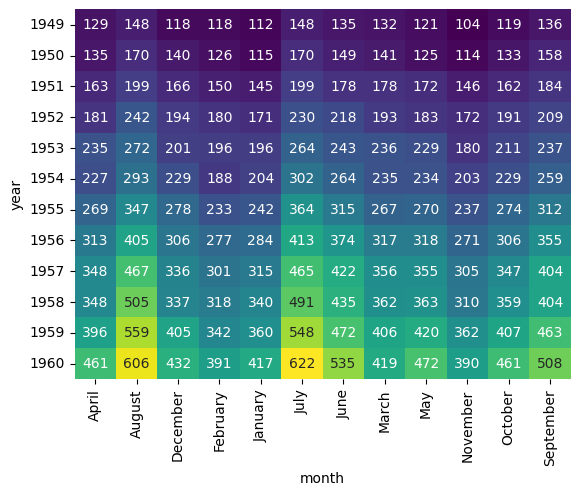

In [30]:
sns.heatmap(flights, annot=True, fmt='.0f', cbar=False, cmap="viridis")
ax.set(xlabel="Month", ylabel="Year")
plt.show()

### Cartograms
A specific type of heatmap called a chloropleth projects heatmap values onto a map.  For example, suppose we wanted to visualize world population by country.

First, we will need a special library called Geopandas.

In [54]:
import geopandas

After installing Geopandas, we can load a dataset.  Notice the columns in the dataset, specifically the ```geometry``` column, which contains the points that outline each country.

In [52]:
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = geopandas.read_file(url)
world

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,None,None,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,..."
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Unrecognized,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.68 10.76, -61.105 10.89, -60.895..."


To plot a chloropleth, all we have to do is call ```plot()``` on the dataset and provide the ```column``` corresponding to the number we want to plot.  We can set the colormap the same way we did with Seaborn's heatmap.

<Axes: >

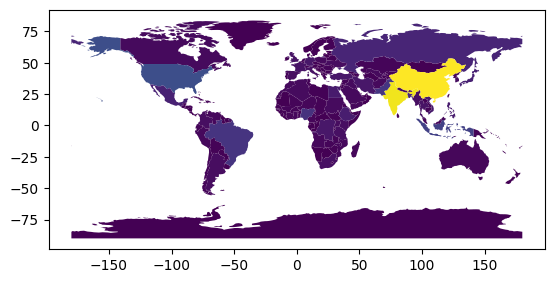

In [53]:
world.plot(column="POP_EST", cmap="viridis")

### Exercise 4: World GDP
Can you visualize the GDP of each country?

<Axes: >

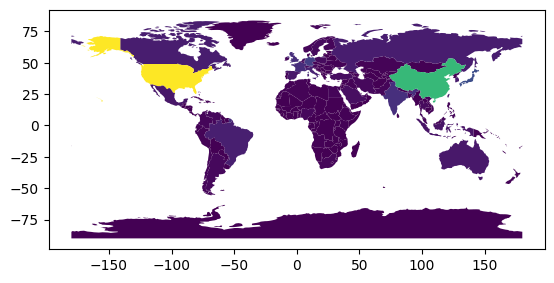

In [60]:
# Your code here
# HINT: You can get a list of the available columns with the following command:
#list(world.columns)
world.plot(column="GDP_MD", cmap="viridis")